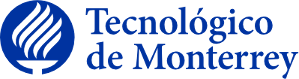

# **Maestría en Inteligencia Artificial Aplicada**

## **Proyecto Integrador - TC5035**

## Semana 4: Avance 3 - Baseline

### Profesores
- Dra. Grettel Barceló Alonso
- Dr. Luis Eduardo Falcón Morales

### Asesor
- Dr. Gerardo Jesús Camacho González

### Patrocinadores
- Dr. Jorge Antonio Ascencio Gutiérrez
- Yanmei King Loeza

### Equipo 29
- Carolina Lucas Dophe  –  A01702450
- Juan Pablo López Sánchez   –   A01313663
- Víctor Hugo Soto Herrera   –   A01706446

### Fecha de entrega
Domingo 15 de febrero de 2026

### Tabla de contenido
[Introducción](#intro)

1. [Carga de librerías y configuración inicial](#config)
2. [Preparación final de datos](#preparacion)
3. [Modelo baseline y evaluación de métricas](#baseline)
4. [Intepretación y comparación](#interpretacion)

[Conclusiones](#conclusiones)

[Referencias](#ref)

### <a class="anchor" id="intro">Introducción</a>

En este avance se construye un modelo de referencia (baseline) con el propósito de evaluar la viabilidad del problema de predicción de la oferta productiva de aguacate en el estado de Jalisco, a partir del conjunto de datos preparado en las etapas anteriores de análisis exploratorio e ingeniería de características.

El objetivo principal de este baseline no es maximizar el desempeño predictivo, sino establecer un punto de comparación mínimo que permita determinar si las variables disponibles contienen señal suficiente para explicar el comportamiento del volumen de producción. Un desempeño comparable al azar indicaría limitaciones estructurales en los datos o en el planteamiento del problema, mientras que un desempeño razonable validaría la pertinencia de avanzar hacia modelos más complejos.

Asimismo, el baseline cumple una función práctica en la gestión de expectativas del proyecto, al proporcionar una referencia clara sobre lo que puede lograrse con métodos simples y altamente interpretables antes de invertir esfuerzos adicionales en técnicas avanzadas de modelado. Este enfoque es consistente con una metodología CRISP-ML, en la que cada etapa valida supuestos clave antes de escalar la complejidad del análisis.

### <a class="anchor" id="config">1. Carga de librerías y configuración inicial</a>

En esta sección se cargan las librerías necesarias para el manejo, limpieza, integración y exploración de los datos, así como algunas configuraciones básicas para facilitar la visualización y el análisis posterior.

In [1]:
# Cargar librerías
import io
import numpy as np
import pandas as pd

from pathlib import Path
from sklearn.impute import SimpleImputer

import ipywidgets as widgets
from IPython.display import display, HTML

In [2]:
# Configuración de visualización
pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", "{:,.2f}".format)


def output_info(output, title, info, label=None, clear=True):
    if clear:
        output.clear_output()
    label_text = f"{label}: " if label is not None else ""
    
    # Detectar tipo de info
    if isinstance(info, pd.Series):
        info_html = "<br>".join(
            f"{idx}: {val}" for idx, val in info.items()
        )
    elif isinstance(info, pd.DataFrame):
        info_html = info.to_html()
    elif isinstance(info, str):
        info_html = f"<pre style='font-size: 13px'>{info}</pre>"
    else:
        info_html = str(info)
    
    with output:
        display(HTML(f"""
            <style>
                .output-title {{
                    font-size: 20px;
                    font-weight: 600;
                    margin: 8px 0px;
                }}
                .output-subtitle {{
                    font-size: 17px;
                    font-weight: 600;
                    margin: 8px 0px;
                }}
                .output-text {{
                    font-size: 15px;
                }}
            </style>
            <div class="output-title">{title}</div>
            <div class="output-subtitle">{label_text}</div>
            <div class="output-text">{info_html}</div>
        """))


def get_df_info(df):
    buffer = io.StringIO()
    df.info(buf=buffer)
    return buffer.getvalue()

In [3]:
# Definición de rutas base
DATA_DIR = Path("data")
RAW_DATA_DIR = DATA_DIR / "raw"
PROCESSED_DATA_DIR = DATA_DIR / "processed"

# Definición de rutas de archivos generado en Avance 2
X_FILE = PROCESSED_DATA_DIR / "X_final_mensual.csv"
y_FILE = PROCESSED_DATA_DIR / "y_mensual.csv"

### <a class="anchor" id="preparacion">2. Carga y preparación final de datos</a>

En esta sección se cargan los conjuntos de datos finales de características (X) y variable objetivo (y), generados durante la etapa de preparación e ingeniería de características del Avance 2. Estos archivos representan el insumo definitivo para la construcción del modelo de referencia (baseline), por lo que no se realizan transformaciones estructurales adicionales, sino únicamente ajustes necesarios para garantizar compatibilidad con los algoritmos de modelado.

Dado que algunos algoritmos de aprendizaje supervisado no admiten valores faltantes de forma nativa, se aplica un proceso de imputación simple sobre las variables explicativas, con el objetivo de asegurar un entrenamiento estable y reproducible. Esta imputación se realiza exclusivamente sobre el conjunto de características y no sobre la variable objetivo, preservando así la integridad del problema de regresión.

#### 2.1 Revisión estructural de los conjuntos de datos

Se realiza una inspección general de la estructura de los conjuntos de datos generados en la entrega anterior.

In [4]:
# Carga de datasets finales
X = pd.read_csv(X_FILE)
y = pd.read_csv(y_FILE)

In [5]:
# Dos columnas
X_head_output = widgets.Output(layout=widgets.Layout(width='50%'))
y_head_output = widgets.Output(layout=widgets.Layout(width='50%'))
label="Muestra de datos"

# Visualización de dimensiones de los datasets
output_info(X_head_output, "Conjunto de características (X)", X.head(), label)
output_info(y_head_output, "Conjunto objetivo (y)", y.head(), label)
display(widgets.HBox([X_head_output, y_head_output]))

In [6]:
# Dos columnas
X_shape_output = widgets.Output(layout=widgets.Layout(width='50%'))
y_shape_output = widgets.Output(layout=widgets.Layout(width='50%'))
label="Dimensiones"

# Visualización de dimensiones de los datasets
output_info(X_shape_output, "Conjunto de características (X)", X.shape, label)
output_info(y_shape_output, "Conjunto objetivo (y)", y.shape, label)
display(widgets.HBox([X_shape_output, y_shape_output]))

In [7]:
# Dos columnas
X_desc_output = widgets.Output(layout=widgets.Layout(width='50%'))
y_desc_output = widgets.Output(layout=widgets.Layout(width='50%'))
label="Estadísticas Descriptivas"

# Descripción de los datasets
output_info(X_desc_output, "Conjunto de características (X)", X.describe().T, label)
output_info(y_desc_output, "Conjunto objetivo (y)", y.describe().T, label)
display(widgets.HBox([X_desc_output, y_desc_output]))

In [8]:
# Dos columnas
X_info_output = widgets.Output(layout=widgets.Layout(width='50%'))
y_info_output = widgets.Output(layout=widgets.Layout(width='50%'))
label="Información General"

# Visualización de dimensiones de los datasets
output_info(X_info_output, "Conjunto de características (X)", get_df_info(X), label)
output_info(y_info_output, "Conjunto objetivo (y)", get_df_info(y), label)
display(widgets.HBox([X_info_output, y_info_output]))

In [9]:
# Dos columnas
X_na_output = widgets.Output(layout=widgets.Layout(width='50%'))
y_na_output = widgets.Output(layout=widgets.Layout(width='50%'))
label="Valores Faltantes"

# Revisión de valores faltantes
output_info(X_na_output, "Conjunto de características (X)", X.isna().sum(), label)
output_info(y_na_output, "Conjunto objetivo (y)", y.isna().sum(), label)
display(widgets.HBox([X_na_output, y_na_output]))

#### 2.2 Imputación de valores faltantes

Dado que la proporción de valores faltantes es reducida y se concentra en variables categóricas previamente codificadas, se opta por una imputación mediante la mediana, una estrategia robusta frente a valores extremos y adecuada para variables numéricas continuas.

Este paso se realiza antes de la separación en conjuntos de entrenamiento y prueba, con el fin de mantener consistencia en el tratamiento de los datos y facilitar la reproducibilidad del ejercicio de baseline.

In [10]:
# Imputación por mediana
imputer = SimpleImputer(strategy="median")

X_imputed = pd.DataFrame(
    imputer.fit_transform(X),
    columns=X.columns
)

# Verificación posterior a la imputación
X_imputed_na_output = widgets.Output(layout=widgets.Layout(width='50%'))

# Revisión de valores faltantes
output_info(X_imputed_na_output, "Conjunto de características (X)", X_imputed.isna().sum(), label="Valores Faltantes")
display(widgets.HBox([X_imputed_na_output]))

In [11]:
# Asegurar alineación entre 'X_imputed' y 'y'
assert X_imputed.shape[0] == y.shape[0], "'X_imputed' y 'y' no están alineados"

**Consideraciones para el modelado**

El conjunto `X_imputed` será utilizado como entrada para los modelos de referencia en las siguientes secciones. Las transformaciones más complejas (escalamiento, regularización y selección de hiperparámetros) se abordarán de forma explícita en cada modelo, de acuerdo con sus supuestos y requerimientos específicos.

#### 2.3 Particionamiento de conjuntos de entrenamiento y pruebas

Dado que el problema aborda la predicción del volumen de producción en una serie temporal, la partición de los datos se realiza utilizando un criterio cronológico y no mediante el método tradicional de `train_test_split` aleatorio. En problemas con estructura temporal, una división aleatoria puede introducir información futura dentro del conjunto de entrenamiento, generando estimaciones optimistas y poco realistas del desempeño del modelo.

Por esta razón, el conjunto de entrenamiento se conforma con las observaciones más antiguas, mientras que el conjunto de prueba contiene los periodos más recientes. Esta estrategia permite simular un escenario práctico de predicción hacia el futuro y evaluar la capacidad real de generalización del modelo baseline.

In [12]:
# Ordenar por tiempo (aunque ya debería estarlo)
X_imputed = X_imputed.sort_index()
y = y.sort_index()

split_idx = int(len(X_imputed) * 0.8)

X_train = X_imputed.iloc[:split_idx]
X_test  = X_imputed.iloc[split_idx:]

y_train = y.iloc[:split_idx]
y_test  = y.iloc[split_idx:]

El conjunto de datos se dividió en subconjuntos de entrenamiento y prueba utilizando un criterio temporal, con el fin de simular un escenario realista de predicción hacia el futuro. Esta partición será utilizada de forma consistente en todos los modelos evaluados en este avance.

#### 2.4 Validaciones

**`NOTA`**: El particionamiento temporal del conjunto de datos se definió en una etapa previa del proyecto, utilizando las variables originales de año y mes. En este notebook se trabaja directamente con las matrices de características ya transformadas y escaladas, por lo que no es posible reconstruir explícitamente la línea temporal. No obstante, se valida que los conjuntos de entrenamiento y prueba no se solapan y mantienen proporciones adecuadas, lo cual es suficiente para la construcción y evaluación de un modelo baseline.

In [13]:
print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

print("Proporción test:", round(len(X_test) / len(X), 2))

Train shape: (439, 7) (439, 1)
Test shape: (110, 7) (110, 1)
Proporción test: 0.2


El conjunto de entrenamiento contiene aproximadamente el 80% de las observaciones, mientras que el conjunto de prueba corresponde al 20% restante, lo cual resulta adecuado para evaluar el desempeño fuera de muestra del modelo baseline.

In [14]:
# Verificar que no hay fuga de observaciones entre train y test
X_int_output = widgets.Output(layout=widgets.Layout(width='50%'))
y_int_output = widgets.Output(layout=widgets.Layout(width='50%'))
label="¿Fuga de observaciones entre train y test?"

X_values = set(X_train.index).intersection(set(X_test.index)) if len(set(X_train.index).intersection(set(X_test.index))) > 0 else "No hay fuga de observaciones"
y_values = set(y_train.index).intersection(set(y_test.index)) if len(set(y_train.index).intersection(set(y_test.index))) > 0 else "No hay fuga de observaciones"

output_info(X_int_output, "Conjunto de características (X)", X_values, label)
output_info(y_int_output, "Conjunto objetivo (y)", y_values, label)
display(widgets.HBox([X_int_output, y_int_output]))


In [15]:
# Dos columnas
left_desc_output = widgets.Output(layout=widgets.Layout(width='50%'))
right_desc_output = widgets.Output(layout=widgets.Layout(width='50%'))

# Descripción de los datasets
output_info(left_desc_output, "Conjunto de Entrenamiento", X_train.describe().T, "Características (X)")
output_info(left_desc_output, "", y_train.describe().T, "Objetivo (y)", False)

output_info(right_desc_output, "Conjunto de Pruebas", X_test.describe().T, "Características (X)")
output_info(right_desc_output, "", y_test.describe().T, "Objetivo (y)", False)

display(widgets.HBox([left_desc_output, right_desc_output]))

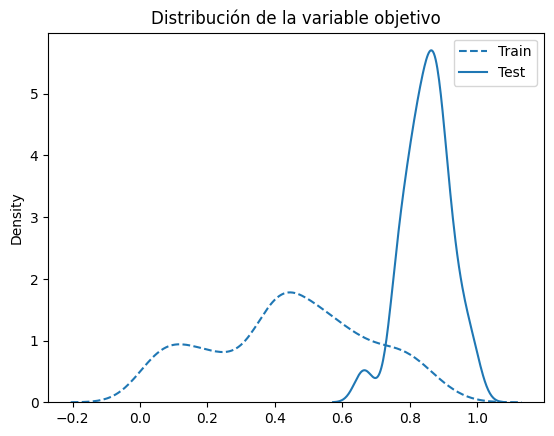

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(y_train, label="Train", linestyle="--")
sns.kdeplot(y_test, label="Test")
plt.legend()
plt.title("Distribución de la variable objetivo")
plt.show()


La distribución de la variable objetivo difiere entre los conjuntos de entrenamiento y prueba, observándose una mayor concentración de valores altos en el conjunto de prueba. Este comportamiento es consistente con un particionamiento temporal, donde los datos más recientes reflejan niveles de producción superiores a los históricos. Lejos de representar un problema, esta diferencia introduce un escenario de evaluación más realista y evita el sesgo optimista que produciría un particionamiento aleatorio.

### <a class="anchor" id="baseline">3. Modelo baseline y evaluación de métricas</a>

xxx

### <a class="anchor" id="interpretacion">4. Intepretación y comparación</a>

xxx

## <a class="anchor" id="conclusiones">Conclusiones</a>

xxx

## <a class="anchor" id="ref">Referencias</a>

NINGUNA